In [58]:
# Imports
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
import graphviz
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import mutual_info_regression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from xgboost import plot_importance
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor, StackingRegressor
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split



In [7]:
bc_data = pd.read_csv(
    '/users/ejgreenjr/Desktop/School/Fall 2024/machine learning /Breast_Cancer.csv',
    sep=',',
    header=0,)
bc_data.head()

bc_data = bc_data.drop(['Age', 'Race', 'Marital Status'], axis=1)

In [9]:
bc_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   T Stage                 4024 non-null   object
 1   N Stage                 4024 non-null   object
 2   6th Stage               4024 non-null   object
 3   differentiate           4024 non-null   object
 4   Grade                   4024 non-null   object
 5   A Stage                 4024 non-null   object
 6   Tumor Size              4024 non-null   int64 
 7   Estrogen Status         4024 non-null   object
 8   Progesterone Status     4024 non-null   object
 9   Regional Node Examined  4024 non-null   int64 
 10  Reginol Node Positive   4024 non-null   int64 
 11  Survival Months         4024 non-null   int64 
 12  Status                  4024 non-null   object
dtypes: int64(4), object(9)
memory usage: 408.8+ KB


In [15]:
numeric_lst = ['int64']
numerical_cols = list(bc_data.select_dtypes(include=numeric_lst).columns)
numerical_cols
bc_data_num = bc_data[numerical_cols]
bc_data_num.head()

#separate numerical and categorical columns
numerical_cols = ['Tumor Size', 'Regional Node Examined', 'Reginol Node Positive']
categorical_cols = list(set(bc_data.columns) - set(numerical_cols) - {'Survival Months'})

#create separate DataFrames for numerical and categorical data
bc_data_num = bc_data[numerical_cols]
bc_data_category = bc_data[categorical_cols]

#scale the numerical data
scaler = StandardScaler()
bc_data_num_scaled = pd.DataFrame(scaler.fit_transform(bc_data_num), columns=numerical_cols)

#encode the categorical data
encoder = OneHotEncoder(drop='first', sparse_output=False)
bc_data_category_encoded = pd.DataFrame(encoder.fit_transform(bc_data_category), 
                                         columns=encoder.get_feature_names_out(categorical_cols))

#combine scaled numerical and encoded categorical data
bc_data_final = pd.concat([bc_data_num_scaled, bc_data_category_encoded], axis=1)

#ad the target variable back to the final df
bc_data_final['Survival Months'] = bc_data['Survival Months']

bc_data_final.head()

,Tumor Size,Regional Node Examined,Reginol Node Positive,Estrogen Status_Positive,A Stage_Regional,Grade_1,Grade_2,Grade_3,Progesterone Status_Positive,T Stage _T2,...,N Stage_N2,N Stage_N3,differentiate_Poorly differentiated,differentiate_Undifferentiated,differentiate_Well differentiated,6th Stage_IIB,6th Stage_IIIA,6th Stage_IIIB,6th Stage_IIIC,Survival Months
0,-1.253661,1.190676,-0.618172,1.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,60
1,0.214345,-0.044095,0.164807,1.0,1.0,0.0,1.0,0.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,62
2,1.540287,-0.044095,0.556296,1.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,75
3,-0.590691,-1.525820,-0.618172,1.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,84
4,0.498475,-1.402343,-0.618172,1.0,1.0,0.0,0.0,1.0,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,50


In [16]:
# Define features (X) and target (y)
X = bc_data_final.drop(['Survival Months'], axis=1)  # Drop the target column
y = bc_data_final['Survival Months']  # Target variable

In [17]:
X

,Tumor Size,Regional Node Examined,Reginol Node Positive,Estrogen Status_Positive,A Stage_Regional,Grade_1,Grade_2,Grade_3,Progesterone Status_Positive,T Stage _T2,...,Status_Dead,N Stage_N2,N Stage_N3,differentiate_Poorly differentiated,differentiate_Undifferentiated,differentiate_Well differentiated,6th Stage_IIB,6th Stage_IIIA,6th Stage_IIIB,6th Stage_IIIC
0,-1.253661,1.190676,-0.618172,1.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.214345,-0.044095,0.164807,1.0,1.0,0.0,1.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1.540287,-0.044095,0.556296,1.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,-0.590691,-1.525820,-0.618172,1.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.498475,-1.402343,-0.618172,1.0,1.0,0.0,0.0,1.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4019,-1.016886,-1.649297,-0.618172,1.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4020,0.735251,-0.044095,0.752041,1.0,1.0,0.0,1.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4021,-0.401271,-0.414526,-0.226682,1.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4022,0.640541,-0.414526,-0.618172,1.0,1.0,0.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [21]:
# Scale numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Compute mutual information for regression
mutual_info = mutual_info_regression(X_scaled, y, random_state=42)

# Create a DataFrame for better readability
feature_importance = pd.DataFrame({'Feature': X.columns, 'Mutual Information': mutual_info})
feature_importance = feature_importance.sort_values(by='Mutual Information', ascending=False)


print(feature_importance)


                                Feature  Mutual Information
12                          Status_Dead            0.137891
3              Estrogen Status_Positive            0.031173
2                 Reginol Node Positive            0.010433
21                       6th Stage_IIIC            0.010198
5                               Grade_1            0.008909
8          Progesterone Status_Positive            0.007895
15  differentiate_Poorly differentiated            0.004933
14                           N Stage_N3            0.004521
4                      A Stage_Regional            0.003518
17    differentiate_Well differentiated            0.002827
7                               Grade_3            0.001631
18                        6th Stage_IIB            0.001522
1                Regional Node Examined            0.000323
20                       6th Stage_IIIB            0.000051
16       differentiate_Undifferentiated            0.000000
19                       6th Stage_IIIA 

In [23]:
# Define a threshold for mutual information
threshold = 0.01

# Filter features with mutual information above the threshold
selected_features = feature_importance[feature_importance['Mutual Information'] > threshold]['Feature'].tolist()

# Select the top features from the original dataset
X_selected = X[selected_features]

In [26]:
#divide the data into train (80%) and test (20%)
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

In [28]:
# Initialize the Random Forest Regressor
rfr = RandomForestRegressor(n_estimators=100, random_state=42)

In [32]:
#train classifier
rfr.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [34]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees
    'max_depth': [None, 10, 20, 30],  # Depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required at a leaf node
    'max_features': ['sqrt', 'log2']  # Number of features to consider at each split
}

# Initialize the Random Forest Regressor
rfr = RandomForestRegressor(bootstrap=True, random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rfr, param_grid=param_grid, cv=5, scoring='r2', verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best parameters and model
best_rfr = grid_search.best_estimator_
print("Best parameters found:", grid_search.best_params_)

# Predict on the test set using the best model
y_pred = best_rfr.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best parameters found: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 50}
Mean Squared Error: 379.62064737665474
R² Score: 0.2897172959473794


In [38]:
# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of boosting stages
    'learning_rate': [0.01, 0.1, 0.2],  # Step size for updating weights
    'max_depth': [3, 5, 10],  # Maximum depth of each tree
    'min_samples_split': [2, 5, 10],  # Minimum samples to split a node
    'min_samples_leaf': [1, 2, 4]  # Minimum samples at a leaf node
}

# Initialize the Gradient Boosting Regressor
gbr = GradientBoostingRegressor(random_state=42)

# Use GridSearchCV to tune hyperparameters
grid_search = GridSearchCV(estimator=gbr, param_grid=param_grid, cv=5, scoring='r2', verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best model and parameters
best_gbr = grid_search.best_estimator_
print("Best parameters found:", grid_search.best_params_)

# Predict on the test set using the best model
y_pred = best_gbr.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best parameters found: {'learning_rate': 0.01, 'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}
Mean Squared Error: 381.15633250009137
R² Score: 0.2868439786249797


In [44]:
# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of boosting rounds
    'learning_rate': [0.01, 0.1, 0.2],  # Step size shrinkage
    'max_depth': [3, 5, 10],  # Maximum depth of trees
    'min_child_weight': [1, 3, 5],  # Minimum sum of weights of all children for a split
    'subsample': [0.8, 1.0],  # Fraction of samples to use for training
    'colsample_bytree': [0.8, 1.0]  # Fraction of features to use for each tree
}

# Initialize the XGBoost Regressor
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# Use GridSearchCV to tune hyperparameters
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='r2', verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best model and parameters
best_xgb = grid_search.best_estimator_
print("Best parameters found:", grid_search.best_params_)

# Predict on the test set using the best model
y_pred = best_xgb.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Best parameters found: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 5, 'n_estimators': 50, 'subsample': 0.8}
Mean Squared Error: 376.64134486095446
R² Score: 0.29529166884217817


<Figure size 1200x800 with 0 Axes>

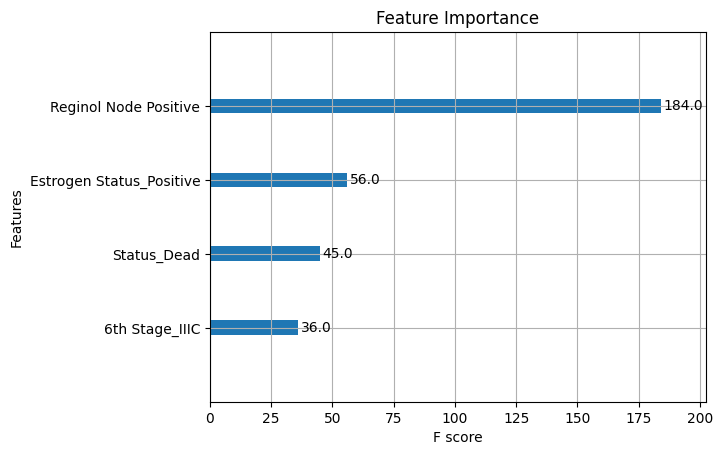

In [48]:
# Plot feature importance
plt.figure(figsize=(12, 8))
plot_importance(best_xgb, importance_type='weight', max_num_features=10)  # Top 10 features by weight
plt.title('Feature Importance')
plt.show()

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

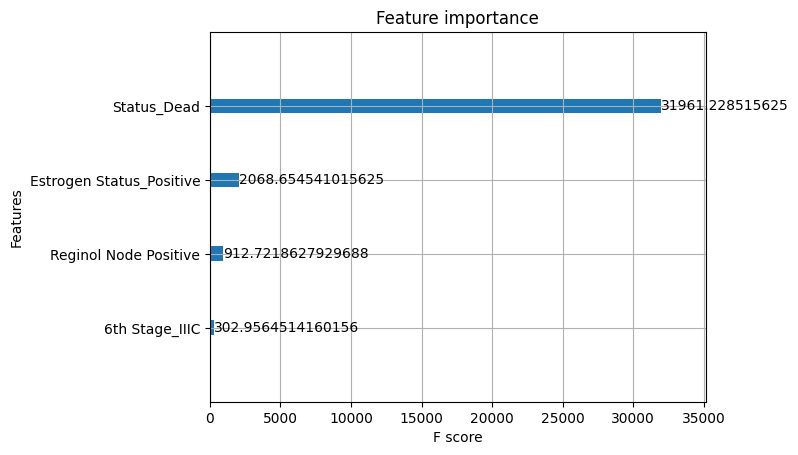

In [50]:
plot_importance(best_xgb, importance_type='gain')


In [60]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Define base models with separate parameters
random_forest = RandomForestRegressor(
    n_estimators=100, 
    max_depth=10, 
    min_samples_split=10, 
    min_samples_leaf=4, 
    random_state=42
)

xgboost = XGBRegressor(
    colsample_bytree=0.8,
    learning_rate=0.1,
    max_depth=3,
    min_child_weight=5,
    n_estimators=50,
    subsample=0.8,
    objective='reg:squarederror',
    random_state=42
)

# Define meta-model
ridge = Ridge(alpha=1.0)

# Create stacking regressor
stacked_model = StackingRegressor(
    estimators=[('rf', random_forest), ('xgb', xgboost)],
    final_estimator=ridge
)

# Train the stacked model
stacked_model.fit(X_train, y_train)

# Predict on test set
y_pred = stacked_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

Mean Squared Error: 377.10199389007545
R² Score: 0.2944297793736145


<Figure size 1200x800 with 0 Axes>

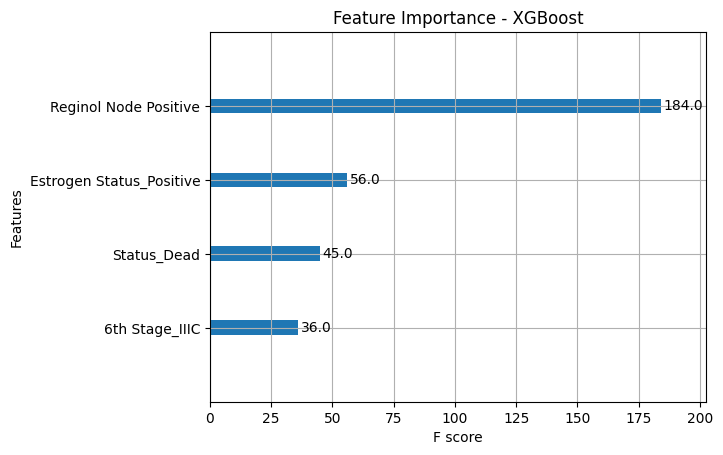

In [66]:
from xgboost import plot_importance
import matplotlib.pyplot as plt

# Plot feature importance using the fitted XGBoost model
plt.figure(figsize=(12, 8))
plot_importance(best_xgb, importance_type='weight', max_num_features=10)
plt.title("Feature Importance - XGBoost")
plt.show()


In [64]:
from sklearn.ensemble import VotingRegressor

voting_model = VotingRegressor(estimators=[('rf', random_forest), ('xgb', xgboost)])
voting_model.fit(X_train, y_train)
y_pred_voting = voting_model.predict(X_test)

mse_voting = mean_squared_error(y_test, y_pred_voting)
r2_voting = r2_score(y_test, y_pred_voting)

print(f"Voting Regressor MSE: {mse_voting}")
print(f"Voting Regressor R²: {r2_voting}")


Voting Regressor MSE: 377.3457103992137
Voting Regressor R²: 0.29397377777747047
